In [1]:
''' IMPORT ALL THE THINGS '''
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array, smart_resize
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import  NASNetLarge

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
''' DEFINE VARIABLES '''

CWD = os.getcwd().replace('\\','/') # get current workspace directory
IMAGE_DIR = f'{CWD}/drive/MyDrive/dataset/orange-classification'
TRAIN_DATASET_DIR = f'{IMAGE_DIR}/train'
TEST_DATASET_DIR = f'{IMAGE_DIR}/test'
VAL_DATASET_DIR = f'{IMAGE_DIR}/validation'

CATEGORIES = ['clementine','grapefruit','orange']

IMAGE_RESIZE = (331, 331) # size of image to put in Model

AUGMENT_N_IMAGE = 4 # how many time each image get the augmentation

AUGMENT_SAVE_PREFIX = 'aug'

Save_model = 'Model2'

print(CWD)

/content


In [ ]:
''' Create Data Augmentation '''
def run_augmentation( isRun = 0 ):

    if isRun:

        print('Running Augmentation...\n')

        datagen = ImageDataGenerator(
            rotation_range=45,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='reflect' # optional : nearest, constant(125), reflect, wrap
        ) 

        try:
            for category in CATEGORIES:

                train_image_in_directory = [] 

                train_category_directory = f"{TRAIN_DATASET_DIR}/{category}"

                for i, image_name in enumerate(os.listdir(train_category_directory)):
                    
                    file_path = f"{train_category_directory}/{image_name}"
                    
                    if (image_name.find(AUGMENT_SAVE_PREFIX) != -1):  # delete old augmentation
                        if (os.path.exists(file_path)):
                            os.remove(file_path)

                    elif (image_name.split('.')[1] in ['png', 'jpg', 'jpeg']):

                        image = load_img(file_path)
                        image = smart_resize(image, IMAGE_RESIZE)
                        image = img_to_array(image)
                        train_image_in_directory.append(image)

                train_image_in_directory = np.array(train_image_in_directory)
                print(f"{category} : ", end="")
                print(train_image_in_directory.shape)

                i = 0
                
                # save_to_dir (option) : f'{train_category_directory}', 'augmented'
                for batch in datagen.flow(train_image_in_directory, batch_size=1, save_to_dir=f'{train_category_directory}', save_prefix=AUGMENT_SAVE_PREFIX, save_format='jpg'):
                    i += 1
                    # datagen.flow make infinite loop NEED A MANUAL BREAK!!!
                    if i >= len(train_image_in_directory) * AUGMENT_N_IMAGE:
                        break

            print('\nAugmentation Success!!!')

        except Exception as e:

            print('\nAugmentation Failed...')
            print('Exception is\n',e)
    
    


In [ ]:
run_augmentation(0)

In [5]:
''' LOAD DATA into Variables '''
try:
    print("Loading data...\n")
    
    print('-----------Train-----------')
    #Load train data

    train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        TRAIN_DATASET_DIR, # train_data path
        image_size=IMAGE_RESIZE, # each image resize
        batch_size=1,
        label_mode='categorical',
        color_mode='rgb',
        shuffle=True
    )

    print(train_dataset.class_names)  # class check
    print(train_dataset)


    print("-----------Validation-----------")
    #Load validation data
    valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        VAL_DATASET_DIR,  # validation_data path
        image_size=IMAGE_RESIZE,  # each image resize
        batch_size=1, 
        label_mode='categorical',
        color_mode='rgb',
        shuffle=True
    )

    print(valid_dataset.class_names)  # class check
    print(valid_dataset)

    print("\nLoad data Success!!!")
    
except Exception as e:

    print("\nLoad data failed...")
    print("Exception is",e)




Loading data...

-----------Train-----------
Found 1990 files belonging to 3 classes.
['clementine', 'grapefruit', 'orange']
<BatchDataset shapes: ((None, 331, 331, 3), (None, 3)), types: (tf.float32, tf.float32)>
-----------Validation-----------
Found 567 files belonging to 3 classes.
['clementine', 'grapefruit', 'orange']
<BatchDataset shapes: ((None, 331, 331, 3), (None, 3)), types: (tf.float32, tf.float32)>

Load data Success!!!


In [6]:
''' Get pre train model '''
NNL = NASNetLarge(input_shape=(331, 331, 3), include_top=False, weights='imagenet')
NNL.trainable = False

343621632/343610240 [==============================] - 11s 0us/step


Epoch 1/10
1990/1990 [==============================] - 365s 168ms/step - loss: 10.4172 - accuracy: 0.3638 - val_loss: 1.1263 - val_accuracy: 0.3545
Epoch 2/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.4037 - accuracy: 0.3523 - val_loss: 1.1156 - val_accuracy: 0.3527
Epoch 3/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.3254 - accuracy: 0.3276 - val_loss: 1.1038 - val_accuracy: 0.3545
Epoch 4/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.0950 - accuracy: 0.3412 - val_loss: 1.1035 - val_accuracy: 0.3545
Epoch 5/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.0952 - accuracy: 0.3317 - val_loss: 1.0945 - val_accuracy: 0.3545
Epoch 6/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.1298 - accuracy: 0.3472 - val_loss: 1.0946 - val_accuracy: 0.3563
Epoch 7/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.2460 - accuracy: 0.3322 - val_loss:

INFO:tensorflow:Assets written to: /content/Model/Model2/512/assets


INFO:tensorflow:Assets written to: /content/Model/Model2/512/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/10
1990/1990 [==============================] - 178s 80ms/step - loss: 11.1495 - accuracy: 0.3578 - val_loss: 1.9240 - val_accuracy: 0.3792
Epoch 2/10
1990/1990 [==============================] - 161s 81ms/step - loss: 2.1452 - accuracy: 0.3302 - val_loss: 1.0908 - val_accuracy: 0.3580
Epoch 3/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.1627 - accuracy: 0.3487 - val_loss: 1.0947 - val_accuracy: 0.3545
Epoch 4/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.0946 - accuracy: 0.3312 - val_loss: 1.0948 - val_accuracy: 0.3545
Epoch 5/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.3107 - accuracy: 0.3362 - val_loss: 1.0951 - val_accuracy: 0.3545
Epoch 6/10
1990/1990 [==============================] - 154s 78ms/step - loss: 1.2070 - accuracy: 0.3327 - val_loss: 1.0950 - val_accuracy: 0.3545
Epoch 7/10
1990/1990 [==============================] - 154s 78ms/step - loss: 1.1483 - accuracy: 0.3467 - val_loss: 

INFO:tensorflow:Assets written to: /content/Model/Model2/256/assets


INFO:tensorflow:Assets written to: /content/Model/Model2/256/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/10
1990/1990 [==============================] - 178s 80ms/step - loss: 10.6577 - accuracy: 0.3638 - val_loss: 1.2711 - val_accuracy: 0.3545
Epoch 2/10
1990/1990 [==============================] - 154s 78ms/step - loss: 3.1402 - accuracy: 0.3523 - val_loss: 1.0948 - val_accuracy: 0.3563
Epoch 3/10
1990/1990 [==============================] - 160s 81ms/step - loss: 1.4506 - accuracy: 0.3342 - val_loss: 1.0945 - val_accuracy: 0.3563
Epoch 4/10
1990/1990 [==============================] - 156s 78ms/step - loss: 1.1172 - accuracy: 0.3442 - val_loss: 1.2164 - val_accuracy: 0.3563
Epoch 5/10
1990/1990 [==============================] - 154s 78ms/step - loss: 1.1007 - accuracy: 0.3377 - val_loss: 1.0945 - val_accuracy: 0.3563
Epoch 6/10
1990/1990 [==============================] - 154s 78ms/step - loss: 1.0954 - accuracy: 0.3357 - val_loss: 1.0945 - val_accuracy: 0.3563
Epoch 7/10
1990/1990 [==============================] - 154s 78ms/step - loss: 1.0954 - accuracy: 0.3271 - val_loss: 

INFO:tensorflow:Assets written to: /content/Model/Model2/128/assets


INFO:tensorflow:Assets written to: /content/Model/Model2/128/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/10
1990/1990 [==============================] - 174s 80ms/step - loss: 11.0688 - accuracy: 0.3558 - val_loss: 1.2522 - val_accuracy: 0.3580
Epoch 2/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.5543 - accuracy: 0.3402 - val_loss: 1.0940 - val_accuracy: 0.3563
Epoch 3/10
1990/1990 [==============================] - 161s 81ms/step - loss: 1.0957 - accuracy: 0.3487 - val_loss: 1.0940 - val_accuracy: 0.3563
Epoch 4/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.0986 - accuracy: 0.3513 - val_loss: 1.0948 - val_accuracy: 0.3545
Epoch 5/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.0987 - accuracy: 0.3477 - val_loss: 1.0936 - val_accuracy: 0.3580
Epoch 6/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.0958 - accuracy: 0.3312 - val_loss: 1.0940 - val_accuracy: 0.3580
Epoch 7/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.0960 - accuracy: 0.3392 - val_loss: 

INFO:tensorflow:Assets written to: /content/Model/Model2/64/assets


INFO:tensorflow:Assets written to: /content/Model/Model2/64/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/10
1990/1990 [==============================] - 173s 80ms/step - loss: 10.3247 - accuracy: 0.3472 - val_loss: 1.4290 - val_accuracy: 0.3545
Epoch 2/10
1990/1990 [==============================] - 154s 78ms/step - loss: 1.5684 - accuracy: 0.3281 - val_loss: 1.0953 - val_accuracy: 0.3563
Epoch 3/10
1990/1990 [==============================] - 162s 81ms/step - loss: 1.3460 - accuracy: 0.3392 - val_loss: 1.2205 - val_accuracy: 0.3527
Epoch 4/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.3999 - accuracy: 0.3417 - val_loss: 1.0956 - val_accuracy: 0.3545
Epoch 5/10
1990/1990 [==============================] - 154s 78ms/step - loss: 1.5129 - accuracy: 0.3437 - val_loss: 1.0953 - val_accuracy: 0.3563
Epoch 6/10
1990/1990 [==============================] - 154s 78ms/step - loss: 1.0960 - accuracy: 0.3347 - val_loss: 1.0952 - val_accuracy: 0.3563
Epoch 7/10
1990/1990 [==============================] - 154s 78ms/step - loss: 1.0957 - accuracy: 0.3372 - val_loss: 

INFO:tensorflow:Assets written to: /content/Model/Model2/32/assets


INFO:tensorflow:Assets written to: /content/Model/Model2/32/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/10
1990/1990 [==============================] - 182s 84ms/step - loss: 10.1117 - accuracy: 0.3568 - val_loss: 1.0973 - val_accuracy: 0.3545
Epoch 2/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.1061 - accuracy: 0.3377 - val_loss: 1.0950 - val_accuracy: 0.3563
Epoch 3/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.0987 - accuracy: 0.3523 - val_loss: 1.0946 - val_accuracy: 0.3545
Epoch 4/10
1990/1990 [==============================] - 154s 78ms/step - loss: 1.1338 - accuracy: 0.3528 - val_loss: 1.0950 - val_accuracy: 0.3563
Epoch 5/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.0954 - accuracy: 0.3462 - val_loss: 1.0949 - val_accuracy: 0.3545
Epoch 6/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.0952 - accuracy: 0.3427 - val_loss: 1.0950 - val_accuracy: 0.3563
Epoch 7/10
1990/1990 [==============================] - 155s 78ms/step - loss: 1.0963 - accuracy: 0.3256 - val_loss: 

INFO:tensorflow:Assets written to: /content/Model/Model2/16/assets


INFO:tensorflow:Assets written to: /content/Model/Model2/16/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/10
1990/1990 [==============================] - 178s 80ms/step - loss: 11.2055 - accuracy: 0.3668 - val_loss: 1.0953 - val_accuracy: 0.3563
Epoch 2/10
1990/1990 [==============================] - 161s 81ms/step - loss: 2.0920 - accuracy: 0.3312 - val_loss: 1.1147 - val_accuracy: 0.3563
Epoch 3/10
1990/1990 [==============================] - 153s 77ms/step - loss: 1.2024 - accuracy: 0.3337 - val_loss: 1.1050 - val_accuracy: 0.3563
Epoch 4/10
1990/1990 [==============================] - 153s 77ms/step - loss: 1.5210 - accuracy: 0.3497 - val_loss: 1.1819 - val_accuracy: 0.3527
Epoch 5/10
1990/1990 [==============================] - 153s 77ms/step - loss: 1.0976 - accuracy: 0.3452 - val_loss: 1.0995 - val_accuracy: 0.3545
Epoch 6/10
1990/1990 [==============================] - 153s 77ms/step - loss: 1.0946 - accuracy: 0.3523 - val_loss: 1.0996 - val_accuracy: 0.3563
Epoch 7/10
1990/1990 [==============================] - 153s 77ms/step - loss: 1.2442 - accuracy: 0.3558 - val_loss: 

INFO:tensorflow:Assets written to: /content/Model/Model2/8/assets


INFO:tensorflow:Assets written to: /content/Model/Model2/8/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/10
1990/1990 [==============================] - 172s 79ms/step - loss: 10.5132 - accuracy: 0.3492 - val_loss: 1.5578 - val_accuracy: 0.3774
Epoch 2/10
1990/1990 [==============================] - 153s 77ms/step - loss: 1.4955 - accuracy: 0.3347 - val_loss: 1.0935 - val_accuracy: 0.3563
Epoch 3/10
1990/1990 [==============================] - 159s 80ms/step - loss: 1.1886 - accuracy: 0.3447 - val_loss: 1.0945 - val_accuracy: 0.3563
Epoch 4/10
1990/1990 [==============================] - 154s 77ms/step - loss: 1.0917 - accuracy: 0.3407 - val_loss: 1.0945 - val_accuracy: 0.3545
Epoch 5/10
1990/1990 [==============================] - 154s 77ms/step - loss: 1.2379 - accuracy: 0.3447 - val_loss: 1.2667 - val_accuracy: 0.3563
Epoch 6/10
1990/1990 [==============================] - 153s 77ms/step - loss: 1.1303 - accuracy: 0.3412 - val_loss: 1.0933 - val_accuracy: 0.3580
Epoch 7/10
1990/1990 [==============================] - 153s 77ms/step - loss: 1.1630 - accuracy: 0.3457 - val_loss: 

INFO:tensorflow:Assets written to: /content/Model/Model2/4/assets


INFO:tensorflow:Assets written to: /content/Model/Model2/4/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


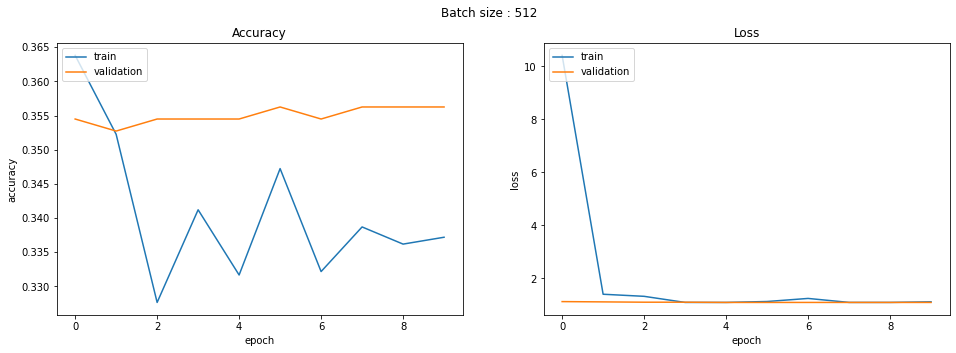

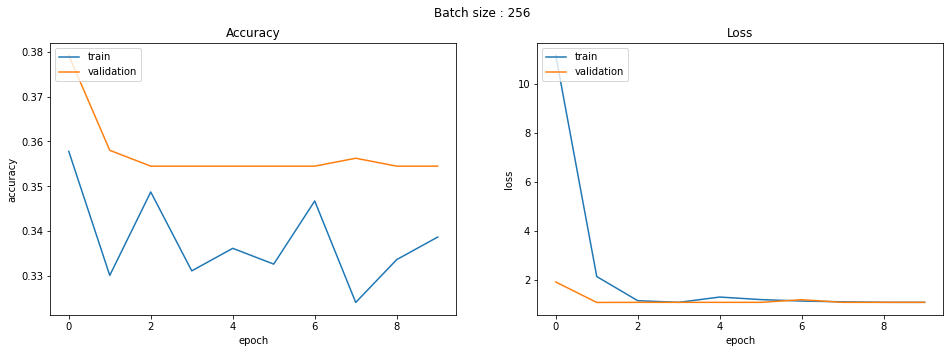

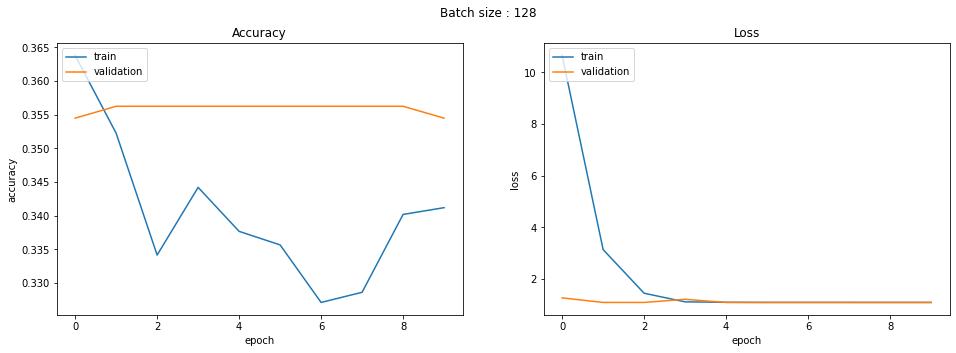

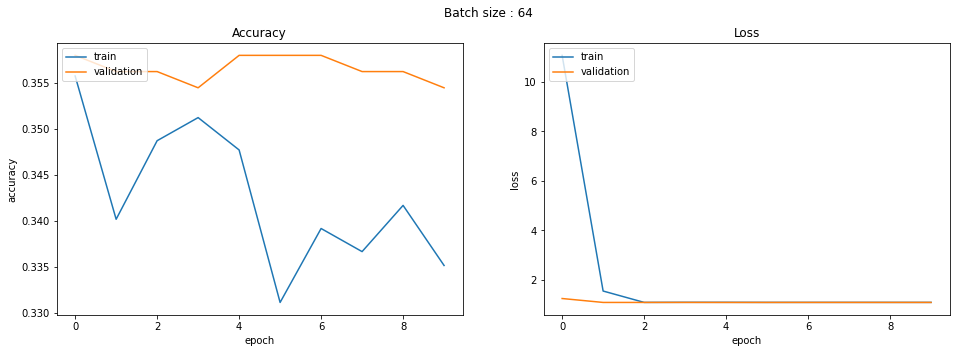

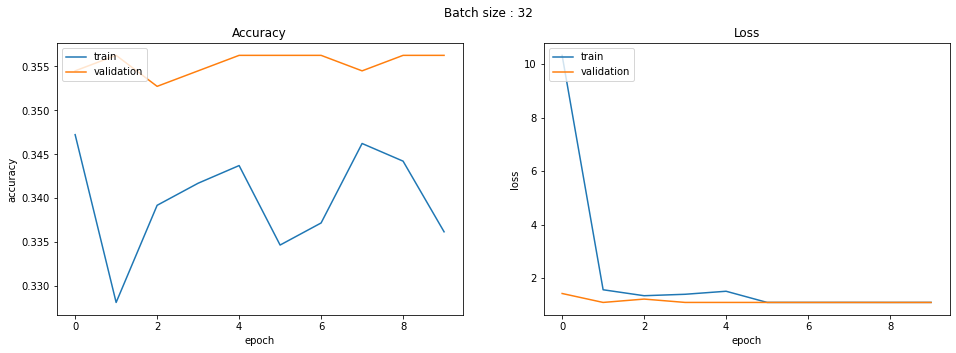

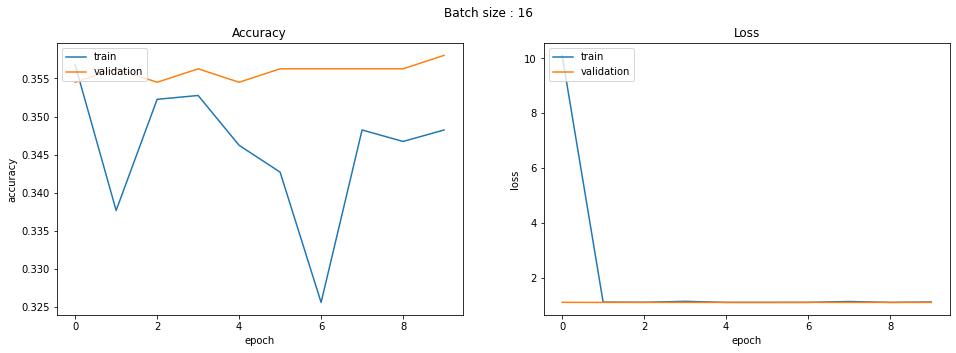

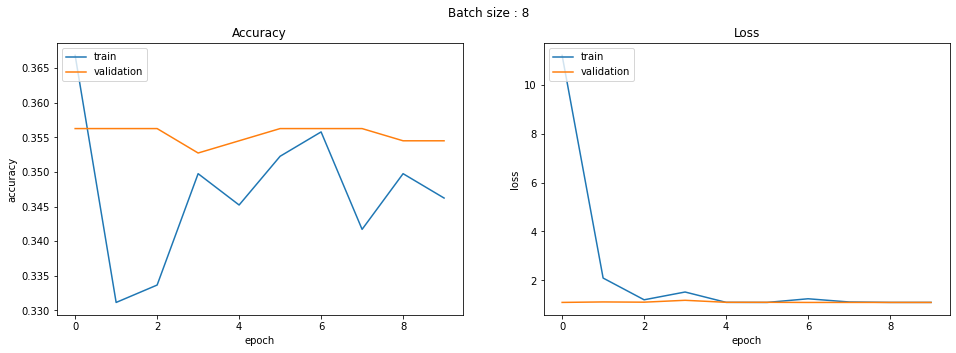

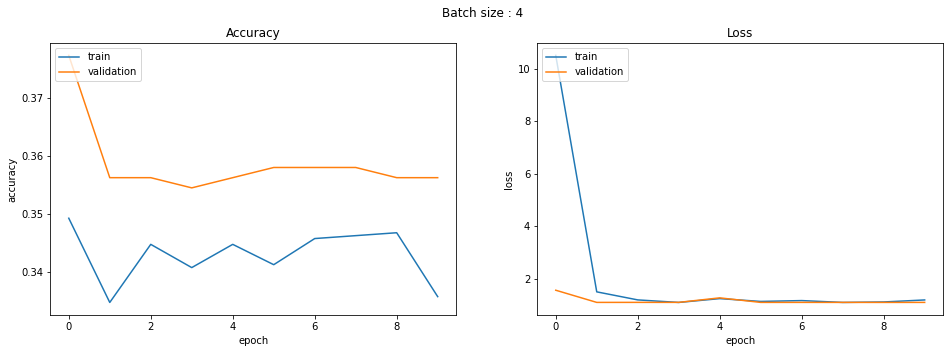

In [7]:
''' Training and Display result'''
BATCH_SIZE = [512, 256, 128, 64, 32, 16, 8, 4]

for i, batch in enumerate(BATCH_SIZE):
    
    # create model architecture
    model = tf.keras.models.Sequential([
                                    NNL,
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(3, activation='softmax')
    ])
    
    # compile
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    los = tf.keras.losses.categorical_crossentropy
    model.compile( optimizer = opt , loss = los , metrics = ['accuracy'] )
    
    # Training
    model.fit(
        
        train_dataset,  # both data and label cause we use preprocessing
        validation_data=valid_dataset,
        batch_size=batch,
        epochs=10, ### can be change
        shuffle=True 
    )
    
    # Plot the result
    fig, axs = plt.subplots(1,2, figsize=(16,5))
    fig.suptitle(f"Batch size : {batch}")
    axs[0].plot(model.history.history['accuracy'])
    axs[0].plot(model.history.history['val_accuracy'])
    axs[0].set_title('Accuracy')
    axs[0].legend(['train', 'validation'], loc='upper left')
    axs[0].set(xlabel='epoch', ylabel='accuracy')

    axs[1].plot(model.history.history['loss'])
    axs[1].plot(model.history.history['val_loss'])
    axs[1].set_title('Loss')
    axs[1].legend(['train', 'validation'], loc='upper left')
    axs[1].set(xlabel='epoch', ylabel='loss')
    
    ''' Save the model '''
    model.save(f'{CWD}/Model/{Save_model}/{batch}')